# 1. Import libraries



In [106]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data

Now import and read the 3 datasets as outlined in the introduction.

In [107]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("gender_submission.csv")

train_copy = pd.read_csv("train.csv")
test_copy = pd.read_csv("test.csv")


Let's have a look at the datasets.

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Data description

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the [data](https://www.kaggle.com/c/titanic/data) tab of the competition page.

- Survived: 0 = Did not survive, 1 = Survived

- Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

- Sex: Male or female

- Age: Age in years, fractional if less than 1

- SibSp: Number of siblings or spouses aboard the titanic

- Parch: Number of parents or children aboard the titanic

- Ticket: Passenger ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

The training set includes passengers survival status (also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create the machine learning model.

The test set should be used to see how well the model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.

This is clearly a <font color='red'>__Classification problem__.</font> In predictive analytics, when the <font color='red'>__target__</font> is a categorical variable, we are in a category of tasks known as <font color='red'>__classification tasks.__</font>

# 4. Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

__Exploratory Data Analysis__ refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In summary, it's an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

## 4.1 Data types,data shapes, missing data and summary statistics

### Data Types

In [110]:
# Non-null count and data types of the training

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has 891 rows and 11 features + the __target variable (survived).__ 2 of the features are floats, 5 are integers and 5 are objects.

### Data Shape

In [111]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


Note that the test set has one column less than training set, the Survived column. This is because Survived is our response variable, or sometimes called a target variable. Our job is to analyse the data in the training set and predict the survival of the passengers in the test set.

What about sample submission?

### Missing Values

In [112]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [113]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [114]:
#percentages of missing values in training data
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


Seems like Age, Cabin and Embarked colummns in the training set have missing data  while Age, Fare and Cabin in the test set have missing data. 

In the training set:
The __'Embarked'__ feature has only 2 missing values, which can easily be filled or dropped. It will be much more tricky to deal with the __‘Age’__ feature, which has 177 missing values. The __‘Cabin’__ feature needs further investigation, but it looks like we might want to drop it from the dataset since 77% is missing.

### Statistics

In [115]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__.describe()__ gives an understanding of the central tendencies of the numeric data.

- Above we can see that __38% out of the training-set survived the Titanic.__ 
- We can also see that the passenger age range from __0.4 to 80 years old.__
- We can already detect some features that contain __missing values__, like the ‘Age’ feature (714 out of 891 total).
- There's an __outlier__ for the 'Fare' price because of the differences between the 75th percentile, standard deviation, and the max value (512). We might want to drop that value.

In [116]:
# Summary statistics for test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4.2 Feature analysis

A dataframe is made up of rows and columns. Number of rows correspond to the number of observations in our dataset whereas columns, sometimes called features, represent characteristics that help describe these observations. In our dataset, rows are the passengers on the titanic whereas columns are the features that describe the passengers like their age, gender etc.

Before we move on, it is also important to note the difference between a categorical variable and a numerical variable. Categorical variables, as the name suggests, have values belonging to one of two or more categories and there is usually no intrinsic ordering to these categories. An example of this in our data is the Sex feature. Every passenger is distinctly classified as either male or female. Numerical variables, on the other hand, have a continuous distribution. Some examples of numerical variables are the Age and Fare features.

Knowing if a feature is a numerical variable or categorical variable helps us structure our analysis more properly. For instance, it doesn't make sense to calculate the average of a categorical variable such as gender simply because gender is a binary classification and therefore has no intrinsic ordering to its values.

In this next section of the notebook, we will analyse the features in our dataset individually and see how they correlate with survival probability.

### 4.2.1 Categorical variables

Categorical variables in our dataset are Sex, Pclass and Embarked.

#### Categorical variable: Sex

In [117]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

Observation: There are more male passengers than female passengers on titanic

In [118]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

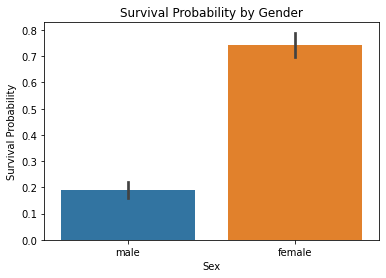

In [119]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

Observation: Female passengers are more likely to survive

#### Categorical variable: Pclass

In [120]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [121]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


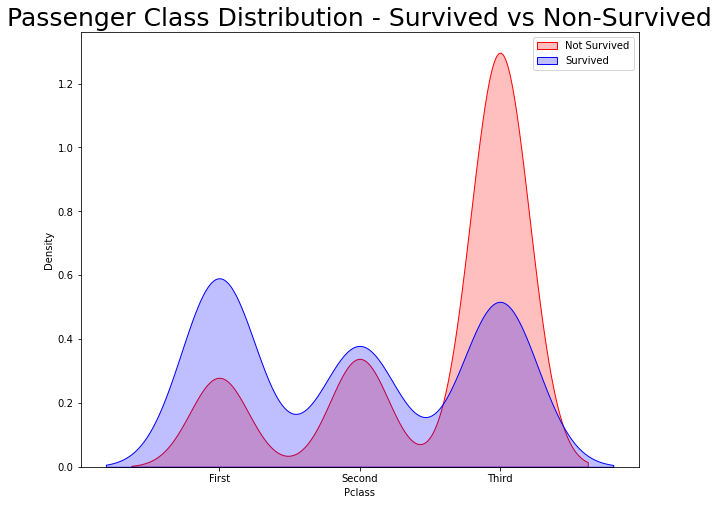

In [122]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels);

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

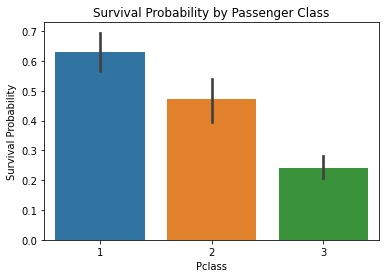

In [123]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

notebook 5
Observation: The graphs above clearly shows that economic status (Pclass) played an important role regarding the potential survival of the Titanic passengers. First class passengers had a much higher chance of survival than passengers in the 3rd class. We note that:

63% of the 1st class passengers survived the Titanic wreck
48% of the 2nd class passengers survived
Only 24% of the 3rd class passengers survived

#### Categorical variables combined: Sex and Plass

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

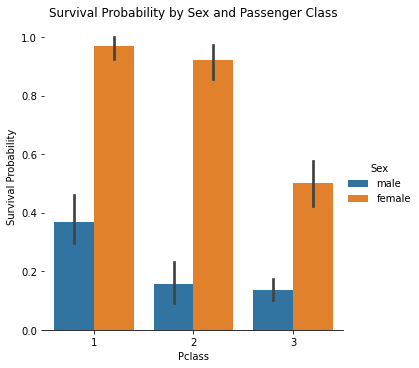

In [124]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

Observation: This indicates that in every class females where always more likely to survive

#### Categorical variable: Embarked

In [125]:
# Value counts of the Embarked column 
#NAN is the missing values in Embarked

train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [126]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

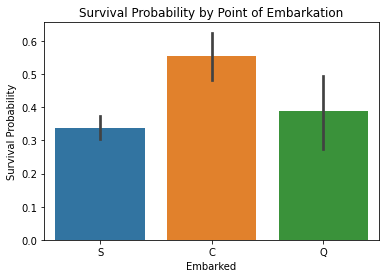

In [127]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

Let us now test this hypothesis.

#### Categorical variable combined: Embarked and Class

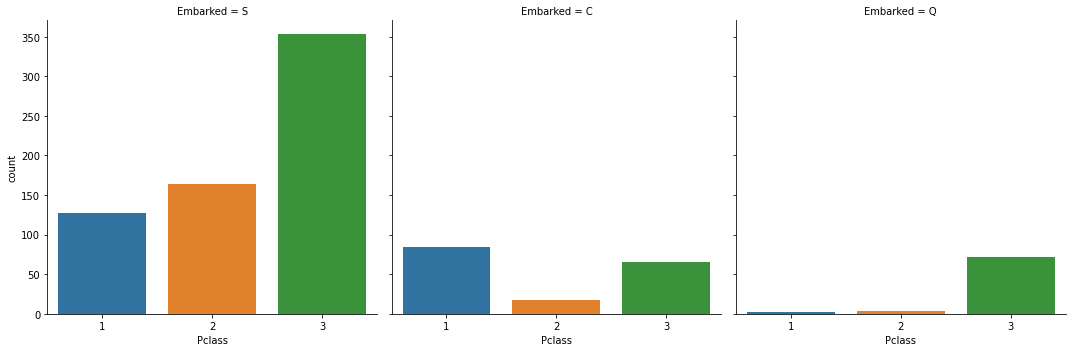

In [128]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

Our hypothesis appears to be true. Location S has the most third class passengers whereas location C has the most first class passengers. 

### 4.2.2 Numerical variables

Numerical variables in our dataset are SibSp, Parch, Age and Fare.

#### Detect outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to detect these outliers which will later be dropped under data processing

In [129]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """

    #can relace outliers with the mean/median (even grouped by title) and then add a column indicating if it was an outlier as the fact it was an outlier might be related to survival
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])#these are the four numerical variables discussed
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop) 

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [130]:
# Outliers in numerical variables
#allows us to look at the 10 rows identified above as rows containing outliers
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


#### Numerical variables correlation with survival

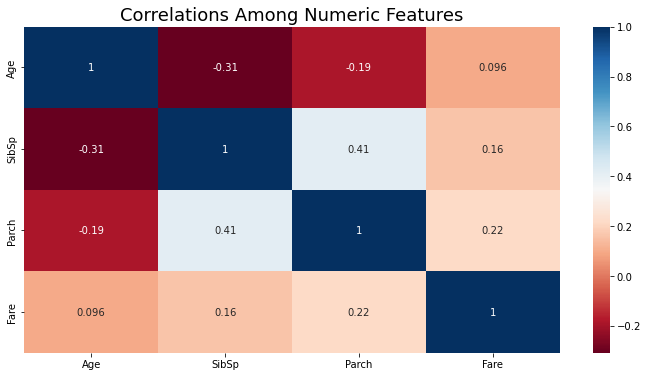

In [131]:
df_num = train[['Age','SibSp','Parch','Fare']]
plt.subplots(figsize = (12,6))
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 18);

We notice from the heatmap above that:
- __Parents and sibling like to travel together <font color='blue'>(light blue squares)__</font> Therefore it will useful to create a isAlone and a family size feature
- __Age has a high negative correlation with number of siblings__

#### Numerical variable: SibSp

In [132]:
# Value counts of the SibSp column 
#numbner of siblings
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [133]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

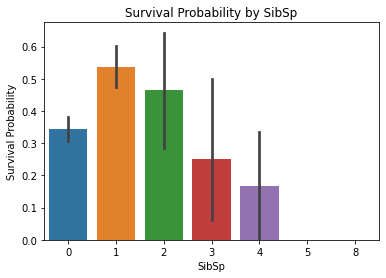

In [134]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

#### Numerical variable: Parch

In [135]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [136]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

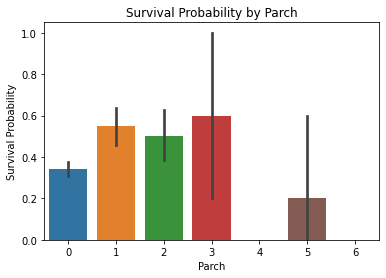

In [137]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

#### Numerical variable: Age

In [138]:
# Null values in Age column 

train['Age'].isnull().sum()

177

Text(0.5, 1.0, 'Passenger Age Distribution')

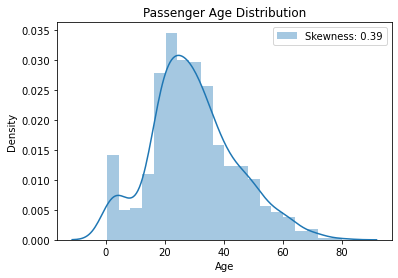

In [139]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

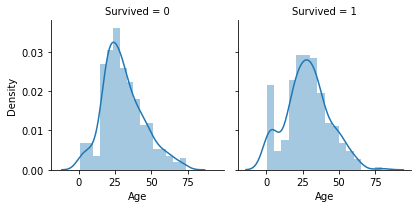

In [140]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

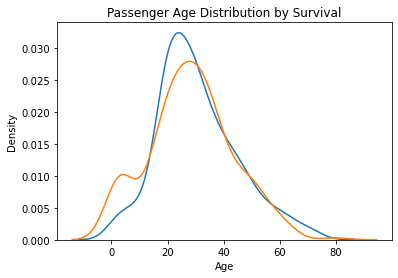

In [141]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

#### Numerical variable: Fare

Text(0, 0.5, 'Passenger Fare Distribution')

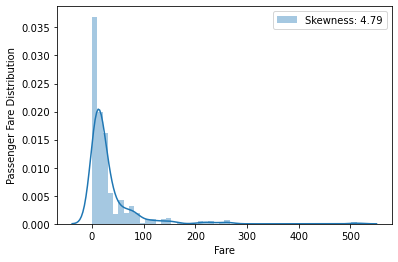

In [142]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

Fare seems to have a high skewness. We will address this issue later on in the notebook via log transformation. 

### 4.2.3 Correlation between categorical and numerical

#### All variables

<AxesSubplot:>

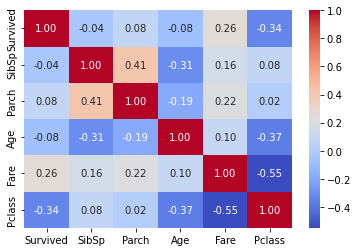

In [143]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare','Pclass']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

Observation: Fare seems to be the only feature that has a substantial correlation with survival

#### Age and Sex

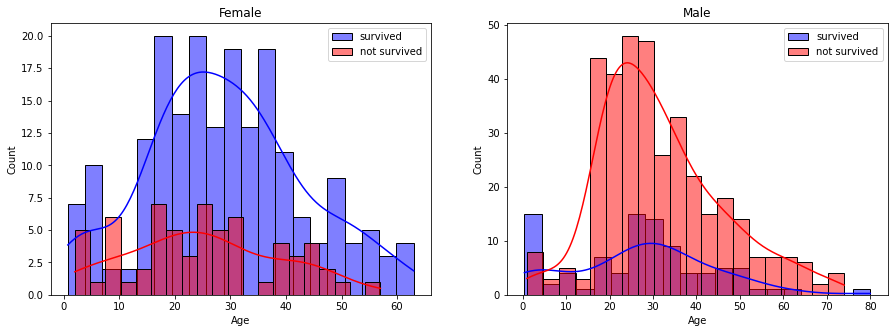

In [144]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');

We can see that __men__ have a higher probability of survival when they are between __18 and 35 years old.__ For __women,__ the survival chances are higher between __15 and 40 years old.__

For men the probability of survival is very low between the __ages of 5 and 18__, and __after 35__, but that isn’t true for women. Another thing to note is that __infants have a higher probability of survival.__

# 5. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

## 5.1 Remove Outliers

In [145]:
# Drop outliers and reset index
# he decides to Drop the 10 rows identified and visualised as outliers and reset index
# he confirms he has done this right be printing out the rows before and after he has dropped it 

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


## 5.2 Drop and fill missing values

In [146]:
# Drop ticket and cabin features from training and test set 
# we can extract some information from the ticket potentially before dropping it

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

I have decided to drop both ticket and cabin for simplicity of this tutorial but if you have the time, I would recommend going through them and see if they can help improve your model.

In [147]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [148]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [149]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [150]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [151]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [152]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [153]:
# Combine training set and test set

# combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
# combine.head()

In [154]:
# Missing values in the combined dataset

# combine.isnull().sum().sort_values(ascending = False)

We can ignore missing values in the Survived column because all of them are from the test set. Now we need to fill missing values in the Age column.

The goal is to use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female. This process is known as encoding and we will further explore this later in the notebook.

In [155]:
# Convert Sex into numerical values where 0 = male and 1 = female
#combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

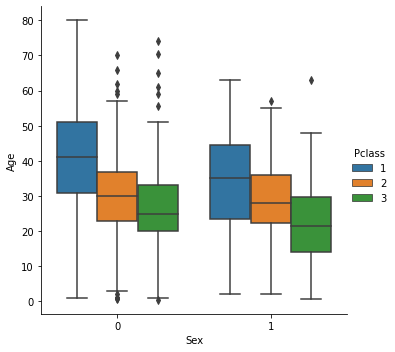

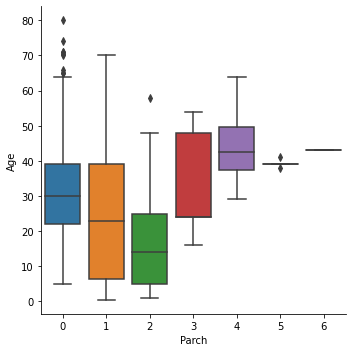

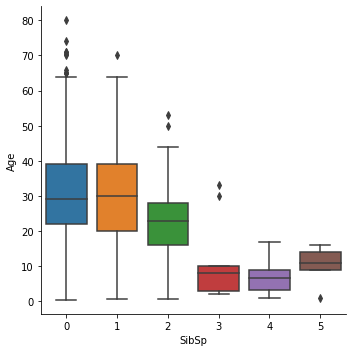

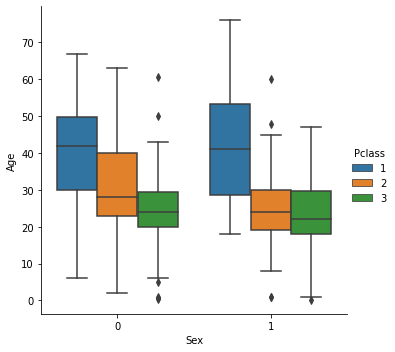

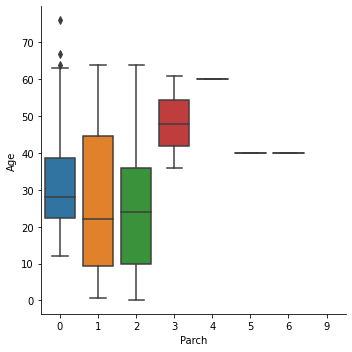

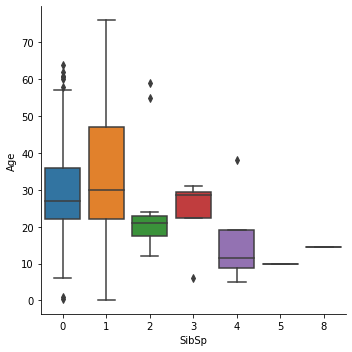

In [156]:
# sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
# sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
# sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = train)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = train)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = train)
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = test)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = test)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = test)

<AxesSubplot:>

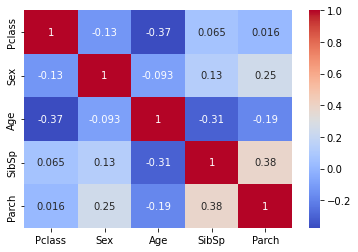

In [157]:
#sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')
sns.heatmap(train.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

Age is not correlated with Sex but is negatively correlated with SibSp, Parch and Pclass. 

In [158]:
# Check number of missing ages 

# age_nan_indices = list(combine[combine['Age'].isnull()].index)
# len(age_nan_indices)

age_nan_indices_train = list(train[train['Age'].isnull()].index)
len(age_nan_indices_train)
age_nan_indices_test = list(test[test['Age'].isnull()].index)


Loop through each missing age in the list to locate the rows that have the same SibSp, Parch and PClass values and fill the missing age with the median of those rows. If rows are not found, simply fill the missing age with the median of the entire Age column.

In [159]:
# Loop through list and impute missing ages

# for index in age_nan_indices:
#     median_age = combine['Age'].median()
#     predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
#                                  & (combine['Parch'] == combine.iloc[index]['Parch'])
#                                  & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
#     if np.isnan(predict_age):
#         combine['Age'].iloc[index] = median_age
#     else:
#         combine['Age'].iloc[index] = predict_age

for index in age_nan_indices_train:
    median_age = train['Age'].median()
    predict_age = train['Age'][(train['SibSp'] == train.iloc[index]['SibSp']) 
                                 & (train['Parch'] == train.iloc[index]['Parch'])
                                 & (train['Pclass'] == train.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        train['Age'].iloc[index] = median_age
    else:
        train['Age'].iloc[index] = predict_age
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
meidan_age = combine['Age'].median()
for index in age_nan_indices_test:
    #use larger sample to fill test data 
    test['Age'].iloc[index] = median_age  

In [160]:
# Make sure there is no more missing ages 

#combine['Age'].isnull().sum()
print(train['Age'].isnull().sum())
test['Age'].isnull().sum()

0


0

## 5.3 Data transformation

Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

In [161]:
# Passenger fare distribution

# sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
# plt.legend(loc = 'best')
# plt.title('Passenger Fare Distribution')

In [162]:
# Apply log transformation to Fare column to reduce skewness

#combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

In [163]:
# Passenger fare distribution after log transformation

# sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
# plt.legend(loc = 'best')
# plt.title('Passenger Fare Distribution After Log Transformation')

## 5.4 Feature engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

In this section, I will construct 3 new features:
- Title
- IsAlone
- Age*Class

### 5.4.1 Title

In [164]:
#combine.head()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [165]:
# Get title from name

# combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
# combine[['Name', 'Title']].head()

train['Title'] = [name.split(',')[1].split('.')[0].strip() for name in train['Name']]
train[['Name', 'Title']].head()
test['Title'] = [name.split(',')[1].split('.')[0].strip() for name in test['Name']]
test[['Name', 'Title']].head()

,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [166]:
# Value counts of Title

#combine['Title'].value_counts()
train['Title'].value_counts()

Mr              513
Miss            177
Mrs             125
Master           39
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [167]:
# Number of unique Title

#combine['Title'].nunique()
train['Title'].nunique()

17

In [168]:
# visualise the testing titles
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [169]:
# Simplify title

# combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
#                                              'Sir', 'Dona'], 'Rare')
# combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
# combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir'], 'Rare')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

test['Title'] = test['Title'].replace(['Dr', 'Rev', 'Col',  'Capt', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Ms'], 'Miss')


<AxesSubplot:xlabel='Title', ylabel='count'>

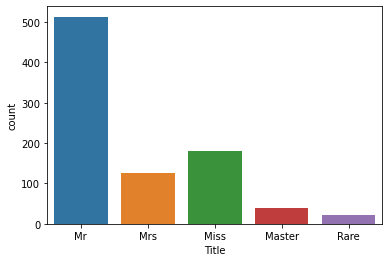

In [170]:
# sns.countplot(combine['Title'])
sns.countplot(train['Title'])
sns.countplot(test['Title'])

In [171]:
# Mean of survival by name title

#combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)
train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

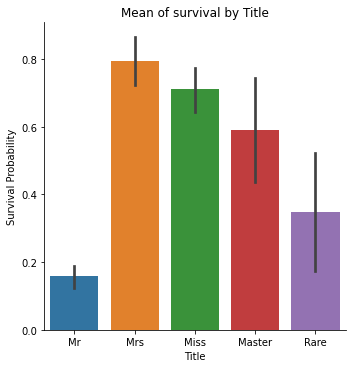

In [172]:
# sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
# plt.ylabel('Survival Probability')
# plt.title('Mean of survival by Title')

sns.factorplot(x = 'Title', y = 'Survived', data = train, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')


In [173]:
# Drop name column

# combine = combine.drop('Name', axis = 1)
# combine.head()

train = train.drop('Name', axis = 1)
train.head()

test = test.drop('Name', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,Mr
1,893,3,1,47.0,1,0,7.0000,S,Mrs
2,894,2,0,62.0,0,0,9.6875,Q,Mr
3,895,3,0,27.0,0,0,8.6625,S,Mr
4,896,3,1,22.0,1,1,12.2875,S,Mrs


### 5.4.2 IsAlone

In [174]:
# Calculate family size from SibSp and Parch

# combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
# combine[['SibSp', 'Parch', 'FamilySize']].head(10)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['SibSp', 'Parch', 'FamilySize']].head(10)

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3
5,0,0,1
6,0,0,1
7,1,1,3
8,0,0,1
9,2,0,3


In [175]:
# Mean of survival by family size

#combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)
train[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000


In [176]:
# Create IsAlone feature

# combine['IsAlone'] = 0
# combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [177]:
# Mean of survival by IsAlone

#combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)
train[['IsAlone', 'FamilySize', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,FamilySize,Survived
0,0,3.09593,0.514535
1,1,1.00000,0.303538


In [178]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

# combine = combine.drop(['SibSp', 'Parch','FamilySize'], axis = 1)
# combine.head()

train = train.drop(['SibSp', 'Parch','FamilySize'], axis = 1)
test = test.drop(['SibSp', 'Parch','FamilySize'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,7.2500,S,Mr,0
1,2,1,1,1,38.0,71.2833,C,Mrs,0
2,3,1,3,1,26.0,7.9250,S,Miss,1
3,4,1,1,1,35.0,53.1000,S,Mrs,0
4,5,0,3,0,35.0,8.0500,S,Mr,1


### 5.4.3 Age*Class

To create our new Age*Class feature, we need to first transform Age into an ordinal variable. Ordinal variable is much like a categorical variable but with intrisinc ordering in their values. 

We will group Ages into 5 separate age bands and assign a number to each age band.

In [179]:
# Create age bands and compute mean of survival by age bands

# combine['AgeBand'] = pd.cut(combine['Age'], 5)
# combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

train['AgeBand'] = pd.cut(train['Age'], 5)
test['AgeBand'] = pd.cut(test['Age'], 5)
train[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.34, 16.336]",0.518868
1,"(16.336, 32.252]",0.343816
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [180]:
# Assign ordinals to each age band 

# combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
# combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
# combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
# combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
# combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

train.loc[train['Age'] <= 16.136, 'Age'] = 0
train.loc[(train['Age'] > 16.136) & (train['Age'] <= 32.102), 'Age'] = 1
train.loc[(train['Age'] > 32.102) & (train['Age'] <= 48.068), 'Age'] = 2
train.loc[(train['Age'] > 48.068) & (train['Age'] <= 64.034), 'Age'] = 3
train.loc[train['Age'] > 64.034 , 'Age'] = 4

test.loc[test['Age'] <= 16.136, 'Age'] = 0
test.loc[(test['Age'] > 16.136) & (test['Age'] <= 32.102), 'Age'] = 1
test.loc[(test['Age'] > 32.102) & (test['Age'] <= 48.068), 'Age'] = 2
test.loc[(test['Age'] > 48.068) & (test['Age'] <= 64.034), 'Age'] = 3
test.loc[test['Age'] > 64.034 , 'Age'] = 4

In [181]:
# Drop age band feature

#combine = combine.drop('AgeBand', axis = 1)

train = train.drop('AgeBand', axis = 1)
test = test.drop('AgeBand', axis = 1)

In [182]:
# Age and Pclass data types 

#combine[['Age', 'Pclass']].dtypes

In [183]:
# Convert ordinal Age into integer

# combine['Age'] = combine['Age'].astype('int')
# combine['Age'].dtype

train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')
train['Age'].dtype

dtype('int32')

In [184]:
# Create Age*Class feature

# combine['Age*Class'] = combine['Age'] * combine['Pclass']
# combine[['Age', 'Pclass', 'Age*Class']].head()

train['Age*Class'] = train['Age'] * train['Pclass']
test['Age*Class'] = test['Age'] * test['Pclass']
train[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [185]:
# Bin Fare 
train['FareBand'] = pd.qcut(train['Fare'], 4)
test['FareBand'] = pd.qcut(test['Fare'], 4)


In [186]:
train = train.drop([ 'Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [187]:
# Assign ordinal to each fare band

# combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
# combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
# combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
# combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [188]:
# Convert Fare into integer

# combine['Fare'] = combine['Fare'].astype('int')

In [189]:
# Drop FareBand feature

# combine = combine.drop('FareBand', axis = 1)

## 5.5 Feature encoding 

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

Previously, we have encoded the sex column such that 0 = male and 1 = female. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.

In [190]:
#combine.head()

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone,Age*Class,FareBand
0,1,0,3,0,1,S,Mr,0,3,"(-0.001, 7.896]"
1,2,1,1,1,2,C,Mrs,0,2,"(30.5, 512.329]"
2,3,1,3,1,1,S,Miss,1,3,"(7.896, 14.454]"
3,4,1,1,1,2,S,Mrs,0,2,"(30.5, 512.329]"
4,5,0,3,0,2,S,Mr,1,6,"(7.896, 14.454]"


In [191]:
# Encode Title and Embarked feature
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# label = LabelEncoder() 
# combine['Embarked'] = label.fit_transform(combine['Embarked'])
# combine['Title'] = label.fit_transform(combine['Title'])
# #combine['AgeBin_Code'] = label.fit_transform(combine['AgeBin'])

# combine['Fare'] = pd.qcut(combine['Fare'], 4)
# combine['Fare'] = label.fit_transform(combine['Fare'])
# #combine = pd.get_dummies(combine, columns = ['Title'])
# #combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
# combine.head()
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder() 
train['Embarked'] = label.fit_transform(train['Embarked'])
train['Title'] = label.fit_transform(train['Title'])
#train['AgeBand'] = label.fit_transform(train['AgeBand'])
train['FareBand'] = label.fit_transform(train['FareBand'])
test['Embarked'] = label.fit_transform(test['Embarked'])
test['Title'] = label.fit_transform(test['Title'])
#test['AgeBand'] = label.fit_transform(test['AgeBand'])
test['FareBand'] = label.fit_transform(test['FareBand'])
#test = pd.get_dummies(combine, columns = ['Title'])
#combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
# Create Age*Class feature

# train['AgeBand*Class'] = train['AgeBand'] * train['Pclass']
# test['AgeBand*Class'] = test['AgeBand'] * test['Pclass']
# train[['AgeBand', 'Pclass', 'AgeBand*Class']].head()
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone,Age*Class,FareBand
0,1,0,3,0,1,2,2,0,3,0
1,2,1,1,1,2,0,3,0,2,3
2,3,1,3,1,1,2,1,1,3,1
3,4,1,1,1,2,2,3,0,2,3
4,5,0,3,0,2,2,2,1,6,1


In [192]:
# # Separate training and test set from the combined dataframe

# train = combine[:len(train)]
# test = combine[len(train):]

In [193]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,2,2,0,3,0
1,1,1,1,2,0,3,0,2,3
2,1,3,1,1,2,1,1,3,1
3,1,1,1,2,2,3,0,2,3
4,0,3,0,2,2,2,1,6,1


In [194]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,2,2,0,3,0
1,1,1,1,2,0,3,0,2,3
2,1,3,1,1,2,1,1,3,1
3,1,1,1,2,2,3,0,2,3
4,0,3,0,2,2,2,1,6,1


In [195]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,IsAlone,Age*Class,FareBand
0,892,3,0,2,1,2,1,6,0
1,893,3,1,2,2,3,0,6,0
2,894,2,0,3,1,2,1,6,1
3,895,3,0,1,2,2,1,3,1
4,896,3,1,1,2,3,0,3,1


In [196]:
# Drop passenger survived column from test set

# test = test.drop('Survived', axis = 1)
# test.head()

Our dataframes are ready for modelling!

# 6. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project. 

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out this scikit-learn [documentation](https://scikit-learn.org/stable/index.html) for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

- Logistic regression
- Support vector machines
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

## 6.1 Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [197]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()#why only drop now
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 8)
Y_train shape:  (881,)
X_test shape:  (418, 8)


## 6.2 Fit model to data and make predictions

This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set. 

### 6.2.1 Logistic regression

 Explanation (not to be included in final submision): In section 6.2, we are training our models using the ENTIRE training set (every row that has a survive column). The models are UNTUNED.. We then calculate the accuracy of each model for the TRAINING set data. In other words we  determine how accurate each model is when it is asked to predict the outcome  (survival)  for the passengers on which it was trained. High scores might be an inidcation of which algorithms are likely to work well for predicting survival for passenges in the test set(this is the ultimate goal), although high scores could also indicate overfitting which is bad . These scores are summarised in the next section

In [198]:
#rael
logreg = LogisticRegression()
LGtrained=logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)


### 6.2.2 Support vector machines

In [199]:
#rael
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)


### 6.2.3 K-nearest neighbours (KNN)

In [200]:
#rael

knn = KNeighborsClassifier(n_neighbors = 5)
KNNtrained=knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### 6.2.4 Gaussian naive bayes

In [201]:
#rael
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### 6.2.5 Perceptron

In [202]:
#rael
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

### 6.2.6 Linear SVC

In [203]:
#rael
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

### 6.2.7 Stochastic gradient descent

In [204]:
#rael
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

### 6.2.8 Decision tree

In [205]:
#rael
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### 6.2.9 Random forest

In [206]:
#rael
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### 6.2.10 CatBoost

In [207]:
#rael
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6866764	total: 1.25ms	remaining: 1.25s
1:	learn: 0.6816346	total: 2.07ms	remaining: 1.03s
2:	learn: 0.6747481	total: 2.93ms	remaining: 973ms
3:	learn: 0.6688221	total: 3.65ms	remaining: 910ms
4:	learn: 0.6631838	total: 4.47ms	remaining: 889ms
5:	learn: 0.6574618	total: 5.24ms	remaining: 868ms
6:	learn: 0.6511476	total: 5.99ms	remaining: 849ms
7:	learn: 0.6453753	total: 6.82ms	remaining: 846ms
8:	learn: 0.6405115	total: 7.5ms	remaining: 825ms
9:	learn: 0.6351087	total: 8.25ms	remaining: 817ms
10:	learn: 0.6302825	total: 9.02ms	remaining: 811ms
11:	learn: 0.6248235	total: 9.77ms	remaining: 805ms
12:	learn: 0.6208872	total: 10.5ms	remaining: 795ms
13:	learn: 0.6160073	total: 11.2ms	remaining: 791ms
14:	learn: 0.6118168	total: 12ms	remaining: 787ms
15:	learn: 0.6074377	total: 12.9ms	remaining: 793ms
16:	learn: 0.6031056	total: 14.1ms	remaining: 813ms
17:	learn: 0.5984166	total: 15.2ms	remaining: 828ms
18:	learn: 0.5937733	total: 16.1ms	remaining: 83

In [208]:
#rael
#MLP
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)
acc_mlp = round(catboost.score(X_train, Y_train) * 100, 2)

In [209]:
#rael
#acc_catboost

## 6.3 Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

### 6.3.1 Training accuracy

Training accuracy shows how well our model has learned from the training set. 

Internal comment: Viewing and summarising the scores calcualted above for each algorithm. These models have have not yet been tuned

In [210]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost','MLP'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost, acc_mlp]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,86.61
1,Decision Tree,86.61
2,CatBoost,86.49
3,MLP,86.49
4,KNN,83.43
5,Support Vector Machines,82.29
6,Linear SVC,79.46
7,Logistic Regression,79.11
8,Naive Bayes,76.50
9,Stochastic Gradient Decent,76.05


### 6.3.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [211]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
classifiers.append(MLPClassifier())


len(classifiers)

11

In [212]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:#each result has 10 subcompoents for each section of the data that was made test if cv equals 10
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))#try other cv's

Learning rate set to 0.009326
0:	learn: 0.6868875	total: 963us	remaining: 963ms
1:	learn: 0.6819611	total: 1.76ms	remaining: 881ms
2:	learn: 0.6752220	total: 2.78ms	remaining: 924ms
3:	learn: 0.6701942	total: 3.6ms	remaining: 896ms
4:	learn: 0.6658297	total: 4.3ms	remaining: 855ms
5:	learn: 0.6602147	total: 5.11ms	remaining: 846ms
6:	learn: 0.6540569	total: 5.9ms	remaining: 838ms
7:	learn: 0.6484162	total: 6.7ms	remaining: 831ms
8:	learn: 0.6436785	total: 7.5ms	remaining: 826ms
9:	learn: 0.6380126	total: 8.2ms	remaining: 811ms
10:	learn: 0.6327099	total: 8.94ms	remaining: 804ms
11:	learn: 0.6275898	total: 9.71ms	remaining: 799ms
12:	learn: 0.6222057	total: 10.5ms	remaining: 794ms
13:	learn: 0.6173311	total: 11.2ms	remaining: 789ms
14:	learn: 0.6122700	total: 12ms	remaining: 785ms
15:	learn: 0.6081120	total: 12.6ms	remaining: 774ms
16:	learn: 0.6033932	total: 13.4ms	remaining: 772ms
17:	learn: 0.6006889	total: 13.9ms	remaining: 758ms
18:	learn: 0.5957665	total: 14.6ms	remaining: 753ms
1

In [213]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [214]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost','MLP']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.817237,0.043016,Support Vector Machines
1,0.810508,0.044236,Random Forest
2,0.810444,0.033328,MLP
3,0.809385,0.045802,CatBoost
4,0.801468,0.052766,Decision Tree
5,0.786759,0.062159,KNN
6,0.786593,0.020315,Logistic Regression
7,0.785444,0.028217,Linear SVC
8,0.762832,0.030491,Gausian Naive Bayes
9,0.761721,0.051537,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

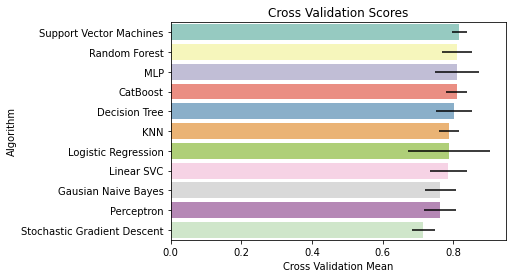

In [215]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

### 6.3.3 Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [216]:
# param_grid = {'n_neighbors': [1,2,3,4,5,6],  
#              # 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#              # 'kernel': ['rbf']}  
# }
# grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3) 

# grid.fit(X_train, Y_train) 

In [217]:
param_grid = {'alpha': [0,1e-5,1e-4,1e-3,1e-2,1e-1,1],  
             # 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
             # 'kernel': ['rbf']}  
}
grid = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...........................alpha=0;, score=0.785 total time=   0.4s
[CV 2/5] END ...........................alpha=0;, score=0.824 total time=   0.4s
[CV 3/5] END ...........................alpha=0;, score=0.807 total time=   0.4s
[CV 4/5] END ...........................alpha=0;, score=0.795 total time=   0.4s
[CV 5/5] END ...........................alpha=0;, score=0.835 total time=   0.4s
[CV 1/5] END .......................alpha=1e-05;, score=0.797 total time=   0.4s
[CV 2/5] END .......................alpha=1e-05;, score=0.830 total time=   0.4s
[CV 3/5] END .......................alpha=1e-05;, score=0.795 total time=   0.5s
[CV 4/5] END .......................alpha=1e-05;, score=0.773 total time=   0.4s
[CV 5/5] END .......................alpha=1e-05;, score=0.824 total time=   0.5s
[CV 1/5] END ......................alpha=0.0001;, score=0.791 total time=   0.4s
[CV 2/5] END ......................alpha=0.0001;,

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'alpha': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             verbose=3)

In [218]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)# what is this

Best parameters:  {'alpha': 0}
Best estimator:  MLPClassifier(alpha=0)


In [219]:
# Training accuracy

# #svc = KNeighborsClassifier(C = 100, gamma = 0.01, kernel = 'rbf')
# knn = KNeighborsClassifier(n_neighbors=6)
# knn.fit(X_train,Y_train)
# #svc.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# acc_svc = round(knn.score(X_train, Y_train) * 100, 2)
# acc_svc

In [220]:
#svc = KNeighborsClassifier(C = 100, gamma = 0.01, kernel = 'rbf')
mlp = grid.best_estimator_
trainedAndTunedlMLP=mlp.fit(X_train,Y_train)
#svc.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)
acc_svc = round(mlp.score(X_train, Y_train) * 100, 2)
acc_svc

83.31

In [221]:
# Mean cross validation score

cross_val_score(mlp, X_train, Y_train, scoring = 'accuracy', cv = 5).mean()

0.8104327170005134

Our mean cross validation score improved slightly.

In [222]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [223]:
len(Y_pred)

418

### 6.3.4 Ensembles

In [224]:
best_trained_MLP =trainedAndTunedlMLP #still not sure what this estimator is
trained_knn = KNNtrained
trained_lg = LGtrained


voting_clf_soft = VotingClassifier(estimators = [('mlp',best_trained_MLP),('knn',trained_knn),('lg',trained_lg)], voting = 'soft') 



print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5).mean())

params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train, Y_train)
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test)

voting_clf_soft.fit(X_train, Y_train)
Y_pred =  voting_clf_soft.predict(X_test).astype(int)

voting_clf_soft : [0.77966102 0.80113636 0.80113636 0.79545455 0.8125    ]
voting_clf_soft mean : 0.79910760143811
Fitting 5 folds for each of 7 candidates, totalling 35 fits


# 7. Preparing data for submission

In [225]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [226]:
ss.shape

(418, 2)

We want our submission dataframe to have 418 rows and 2 columns, PassengerId and Survived. 

In [227]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [228]:
submit.shape

(418, 2)

Our dataframe is ready for submission!

In [229]:
# Create and save csv file 

submit.to_csv("submission.csv", index = False)

# 8. Possible extensions to improve model accuracy

1. Analyse ticket and cabin features
    - Do these features help predict passenger survival?
    - If yes, consider including them in the training set instead of dropping
2. Come up with alternative features in feature engineering
    - Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
    - Does removing features help reduce overfitting in the model?
4. Ensemble modelling
    - This is a more advanced technique whereby you combine prediction results from multiple machine learning models

# 9. Conclusion

You should achieve a submission score of 0.77511 if you follow exactly what I have done in this notebook. In other words, I have correctly predicted 77.5% of the test set. I highly encourage you to work through this project again and see if you can improve on this result.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. Let's help each other get better - happy learning!

My platforms: 
- [Facebook](https://www.facebook.com/chongjason914)
- [Instagram](https://www.instagram.com/chongjason914)
- [Twitter](https://www.twitter.com/chongjason914)
- [LinkedIn](https://www.linkedin.com/in/chongjason914)
- [YouTube](https://www.youtube.com/channel/UCQXiCnjatxiAKgWjoUlM-Xg?view_as=subscriber)
- [Medium](https://www.medium.com/@chongjason)

## References
https://github.com/chongjason914/kaggle-titanic 

https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

https://github.com/murilogustineli/Titanic-Classification

https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

